In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_context("talk")

from sqlalchemy import create_engine, text

pd.set_option("display.max_columns", 22)

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [40]:
import plotly

plotly.__version__

'5.14.1'

In [41]:
df_melb = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv"
)
df_melb[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [42]:
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



#### 1.

**creacion de base de datos**

In [43]:
engine = create_engine(
    "sqlite:///DataBase.sqlite3", echo=True
)  # create database file called 'DataBase.sqlite3' where
# the two tables are going
# to be stored.

### 2.
**Ingestando las tablas**

In [44]:
df_airbnb = pd.read_csv("airbnb_price_by_zipcode.csv")
df_airbnb.head(200)

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN
...,...,...,...,...,...
195,3767.0,215.666667,42,814.000000,2784.500000
196,3770.0,396.166667,24,1050.000000,3200.000000
197,3775.0,337.688889,45,733.166667,2800.000000
198,3777.0,271.256684,187,1278.512195,3802.187500


In [45]:
df_melb.to_sql(
    "melb_data", con=engine, if_exists="replace"
)  # create table named 'melb_data' into 'Database.sqlite3' file
df_airbnb.to_sql(
    "airbnb_data", con=engine, if_exists="replace"
)  # create table named 'airbnb_data'  into 'Database.sqlite3' file

2023-06-05 09:47:36,746 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-05 09:47:36,755 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-05 09:47:36,756 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:36,758 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-05 09:47:36,758 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:36,760 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-06-05 09:47:36,761 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:36,762 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-06-05 09:47:36,764 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:36,768 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb_data")
2023-06-05 09:47:36,770 INFO sqlalchemy.engine.Engine [raw sql] ()


2023-06-05 09:47:37,164 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:37,166 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_data_index")
2023-06-05 09:47:37,167 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:37,170 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb_data")
2023-06-05 09:47:37,171 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:37,172 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_data_index")
2023-06-05 09:47:37,173 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 09:47:37,177 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2023-06-05 09:47:37,178 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_data',)
2023-06-05 09:47:37,181 INFO sqlalchemy.engine.Engine 
DROP TABLE airbnb_data
2023-06-05 09:47:37,183 INFO sqlalchemy.engine.Engine [no key 0.00149s] ()
2023-06-05 09

247

### 3.
- cantidad de registros totales por ciudad.

In [46]:
query1 = "SELECT CouncilArea, COUNT(*) FROM melb_data GROUP BY CouncilArea"

In [47]:
with engine.connect() as con:
    rs = con.execute(text(query1))
    df_rs = pd.DataFrame(
        rs.fetchall()
    )  # inserting list of tuples (query return) into a DataFrame object for visualization
    for row in rs:
        print(row)

2023-06-05 09:47:37,229 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-05 09:47:37,231 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(*) FROM melb_data GROUP BY CouncilArea
2023-06-05 09:47:37,233 INFO sqlalchemy.engine.Engine [generated in 0.00363s] ()
2023-06-05 09:47:37,247 INFO sqlalchemy.engine.Engine ROLLBACK


In [48]:
df_rs.head(10)  # displaying result of query 1

,CouncilArea,COUNT(*)
0,None,1369
1,Banyule,594
2,Bayside,489
3,Boroondara,1160
4,Brimbank,424
5,Cardinia,8
6,Casey,38
7,Darebin,934
8,Frankston,53
9,Glen Eira,848


- cantidad de registros totales por barrio y ciudad.

In [49]:
query2 = "SELECT Suburb, CouncilArea, COUNT(*) FROM melb_data GROUP BY Suburb"

In [50]:
with engine.connect() as con:
    request2 = con.execute(text(query2))
    df_request2 = pd.DataFrame(
        request2.fetchall()
    )  # inserting list of tuples (query return) into a DataFrame object for visualization
    for row in request2:
        print(row)

2023-06-05 09:47:37,274 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-05 09:47:37,275 INFO sqlalchemy.engine.Engine SELECT Suburb, CouncilArea, COUNT(*) FROM melb_data GROUP BY Suburb
2023-06-05 09:47:37,277 INFO sqlalchemy.engine.Engine [generated in 0.00338s] ()
2023-06-05 09:47:37,291 INFO sqlalchemy.engine.Engine ROLLBACK


In [51]:
df_request2.head(20)

,Suburb,CouncilArea,COUNT(*)
0,Abbotsford,Yarra,56
1,Aberfeldie,Moonee Valley,44
2,Airport West,Moonee Valley,67
3,Albanvale,Brimbank,6
4,Albert Park,Port Phillip,69
5,Albion,Brimbank,41
6,Alphington,Darebin,34
7,Altona,Hobsons Bay,74
8,Altona Meadows,Hobsons Bay,6
9,Altona North,Hobsons Bay,56


### 4.
**Join**

In [52]:
query3 = """SELECT *

            FROM
                 melb_data
            LEFT JOIN airbnb_data ON
                melb_data.Postcode = airbnb_data.zipcode
         """

In [53]:
with engine.connect() as con:
    request3 = con.execute(text(query3))
    df_Joined = pd.DataFrame(
        request3.fetchall()
    )  # inserting list of tuples (query return) into a DataFrame object for visualization
    for row in request3:
        print(row)

2023-06-05 09:47:37,318 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-05 09:47:37,320 INFO sqlalchemy.engine.Engine SELECT *

            FROM
                 melb_data
            LEFT JOIN airbnb_data ON
                melb_data.Postcode = airbnb_data.zipcode
         
2023-06-05 09:47:37,321 INFO sqlalchemy.engine.Engine [generated in 0.00267s] ()
2023-06-05 09:47:37,489 INFO sqlalchemy.engine.Engine ROLLBACK


In [54]:
df_Joined[["zipcode", "Postcode"]].head(10)  # checking for succesful pairing

,zipcode,Postcode
0,3067.0,3067.0
1,3067.0,3067.0
2,3067.0,3067.0
3,3067.0,3067.0
4,3067.0,3067.0
5,3067.0,3067.0
6,3067.0,3067.0
7,3067.0,3067.0
8,3067.0,3067.0
9,3067.0,3067.0


In [55]:
df_Joined.columns

Index(['index', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'index',
       'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')

In [56]:
len(df_Joined['Postcode'].unique()) # 13580

198

In [57]:
# A more robust checking

zipcode_postcode_matching = pd.DataFrame()
zipcode_postcode_matching["match"] = pd.Series(
    df_Joined["zipcode"] == df_Joined["Postcode"]
)

number_of_elements = zipcode_postcode_matching.shape[0]
number_of_matchs = zipcode_postcode_matching.loc[
    zipcode_postcode_matching["match"]
].shape[0]

print(f"Total number of elements: {number_of_elements}")
print(f"Total number of matchs: {number_of_matchs}")
zipcode_postcode_matching.loc[~zipcode_postcode_matching["match"]]

Total number of elements: 13580
Total number of matchs: 13560


,match
6817,False
6818,False
8717,False
8817,False
9549,False
10033,False
10576,False
10938,False
11032,False
11371,False


## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

 
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Inciso 1

In [58]:
df_melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [59]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

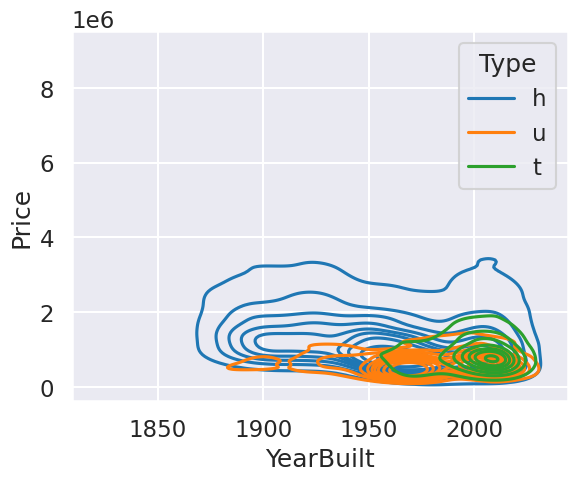

In [123]:
# let's see if there is any clear tendency for year built
sns.set_style("darkgrid")
sns.kdeplot(data=df_melb.loc[df_melb["YearBuilt"] > 1800], x="YearBuilt", y="Price", hue='Type')
plt.show()

In [61]:
# Type:
# - br - bedroom(s);
# - h - house,cottage,villa, semi,terrace;
# - u - unit, duplex; 
# - t - townhouse; dev site - development site;
# - res - other residential.

df_melb["Type"].unique()

array(['h', 'u', 't'], dtype=object)

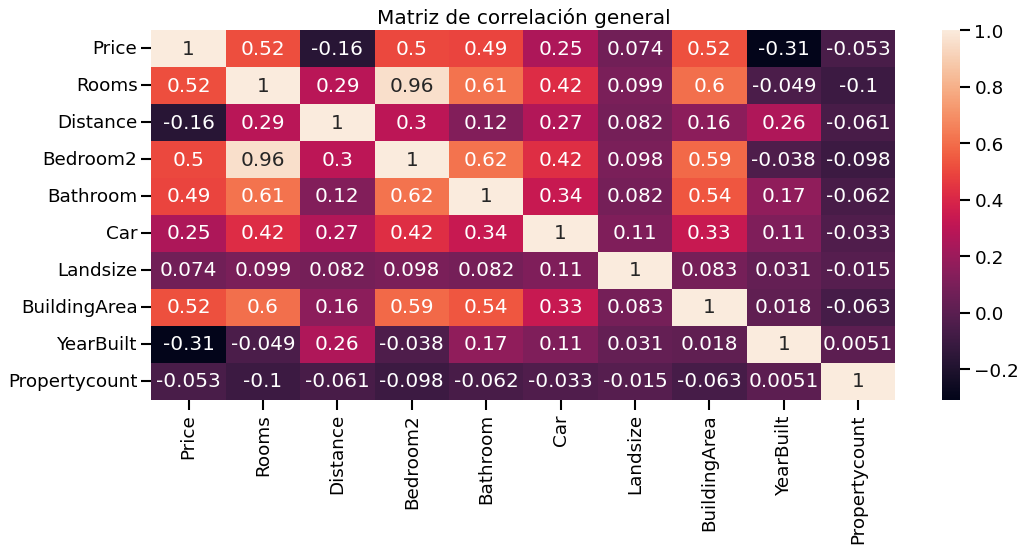

In [77]:
# let's try to choose the columns by looking at their correlation with price
list_of_col_names = [
    "Price",
    "Rooms",
    "Distance",
    "Bedroom2",
    "Bathroom",
    "Car",
    "Landsize",
    "BuildingArea",
    "YearBuilt",
    "Propertycount",
]

df_corr = df_melb[list_of_col_names].dropna().corr()
# df_corr = df_melb[list_of_col_names].loc[df_melb['Type'] == 't'].dropna().corr()

plt.figure(figsize=(15, 6), dpi=80)
sns.heatmap(df_corr, annot=True)
plt.title('Matriz de correlación general')
plt.show()

Del gráfico anterior, podemos ver que lo que más correlaciona con el precio es:
1. Rooms
2. BuildingArea
3. Bedroom2
4. Bathroom
5. YearBuilt
6. Car
7. Distance

`Propertycont` y `Landsize` están por debajo del 0.1 de correlación. En general, estas columnas correlacionan poco con el resto, así que no vamos a incluirlas por ahora. Hay que ver que BuildingArea no tenga demasiados NaN.

Por otro lado, como se vio en el gráfico de Price vs YearBuilt, mientras que el total no muestra una tendencia clara, las casas (Type `h`) alcanzan precios mayores que los otros tipos de propiedades. Esto implica que quizás valga la pena separar el análisis por grupos.

A continuación, hacemos el mismo mapa de calor para la matriz de correlación, pero tomando sólo la primera fila (las correlaciones con la columna de precio), para el data set general, y luego para el filtrado según categoría. Hacemos el gráfico de modo que las filas coincidan para todos los filtros, de modo de poder comparar cómo cambia la correlación general dentro de cada categoría.

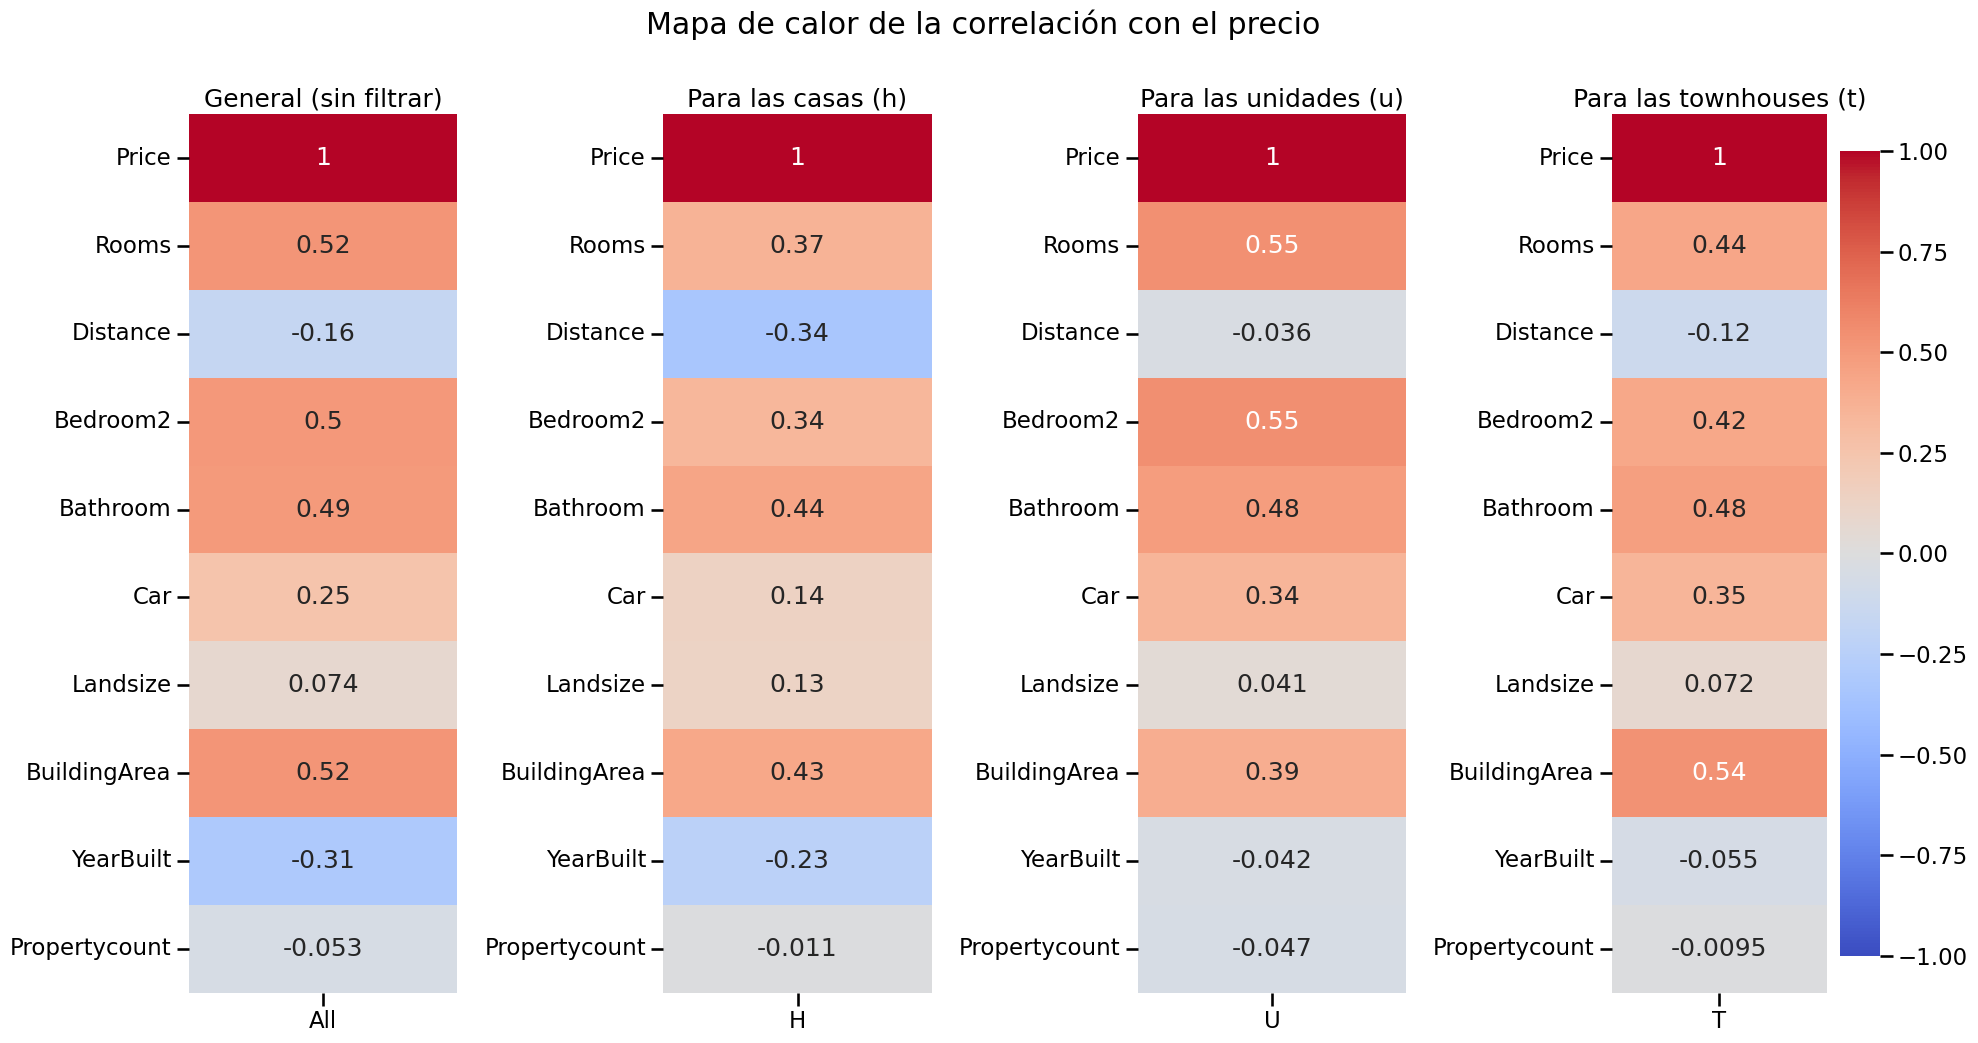

In [95]:
# correlation matrix without filtering
df_corr = df_melb[list_of_col_names].dropna().corr()

# correlation matrix for each type
df_corr_h = df_melb[list_of_col_names].loc[df_melb['Type'] == 'h'].dropna().corr()
df_corr_u = df_melb[list_of_col_names].loc[df_melb['Type'] == 'u'].dropna().corr()
df_corr_t = df_melb[list_of_col_names].loc[df_melb['Type'] == 't'].dropna().corr()

# assuming 'Price' is in list_of_col_names
price_corr = pd.DataFrame([df_corr.loc['Price'], df_corr_h.loc['Price'], df_corr_u.loc['Price'], df_corr_t.loc['Price']], 
                          index=['All', 'H', 'U', 'T']).T

fig, axs = plt.subplots(1, 4, figsize=(20, 10))  # creates a grid of 1 row and 4 columns

# the color map to use
color_map='coolwarm'
# I'm using this one, cause it's a diverging color map
# that emphasizes the distance to zero

sns.heatmap(price_corr[['All']], annot=True, ax=axs[0], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[0].set_title('General (sin filtrar)')

sns.heatmap(price_corr[['H']], annot=True, ax=axs[1], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[1].set_title('Para las casas (h)')

sns.heatmap(price_corr[['U']], annot=True, ax=axs[2], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[2].set_title('Para las unidades (u)')

sns.heatmap(price_corr[['T']], annot=True, ax=axs[3], cmap=color_map, cbar=True, vmin=-1, vmax=1)
axs[3].set_title('Para las townhouses (t)')

plt.tight_layout()  # Ensures that the subplots do not overlap
plt.suptitle('Mapa de calor de la correlación con el precio', y=1.05)
plt.show()

En el anterior gráfico podemos ver que:
1. `Rooms` sigue siendo importante para todos, pero mucho más para `u` que para `h` (quedando `t` al medio). 
2. `BuildingArea` también, pero es mucho más importante para `t` que para `u`, con `h` al medio.
3. `Bedroom2` sigue un comportamiento similar a `Rooms` en las tres categorías.
4. `Bathroom` es similarmente importante para todas.
5. `YearBuilt` parece ser relevante para las casas (`h`)
6. `Car` correlaciona menos con el precio para `h` que para el resto.
7. `Distance` correlaciona mucho más para `u` que para `h` (quedando `t` al medio).

Para ver mejor qué es importante para cada categoría, en lugar de ordernar las filas para que coincidan a través de las categorías de filtrado, las ordenamos según correlación decreciente.

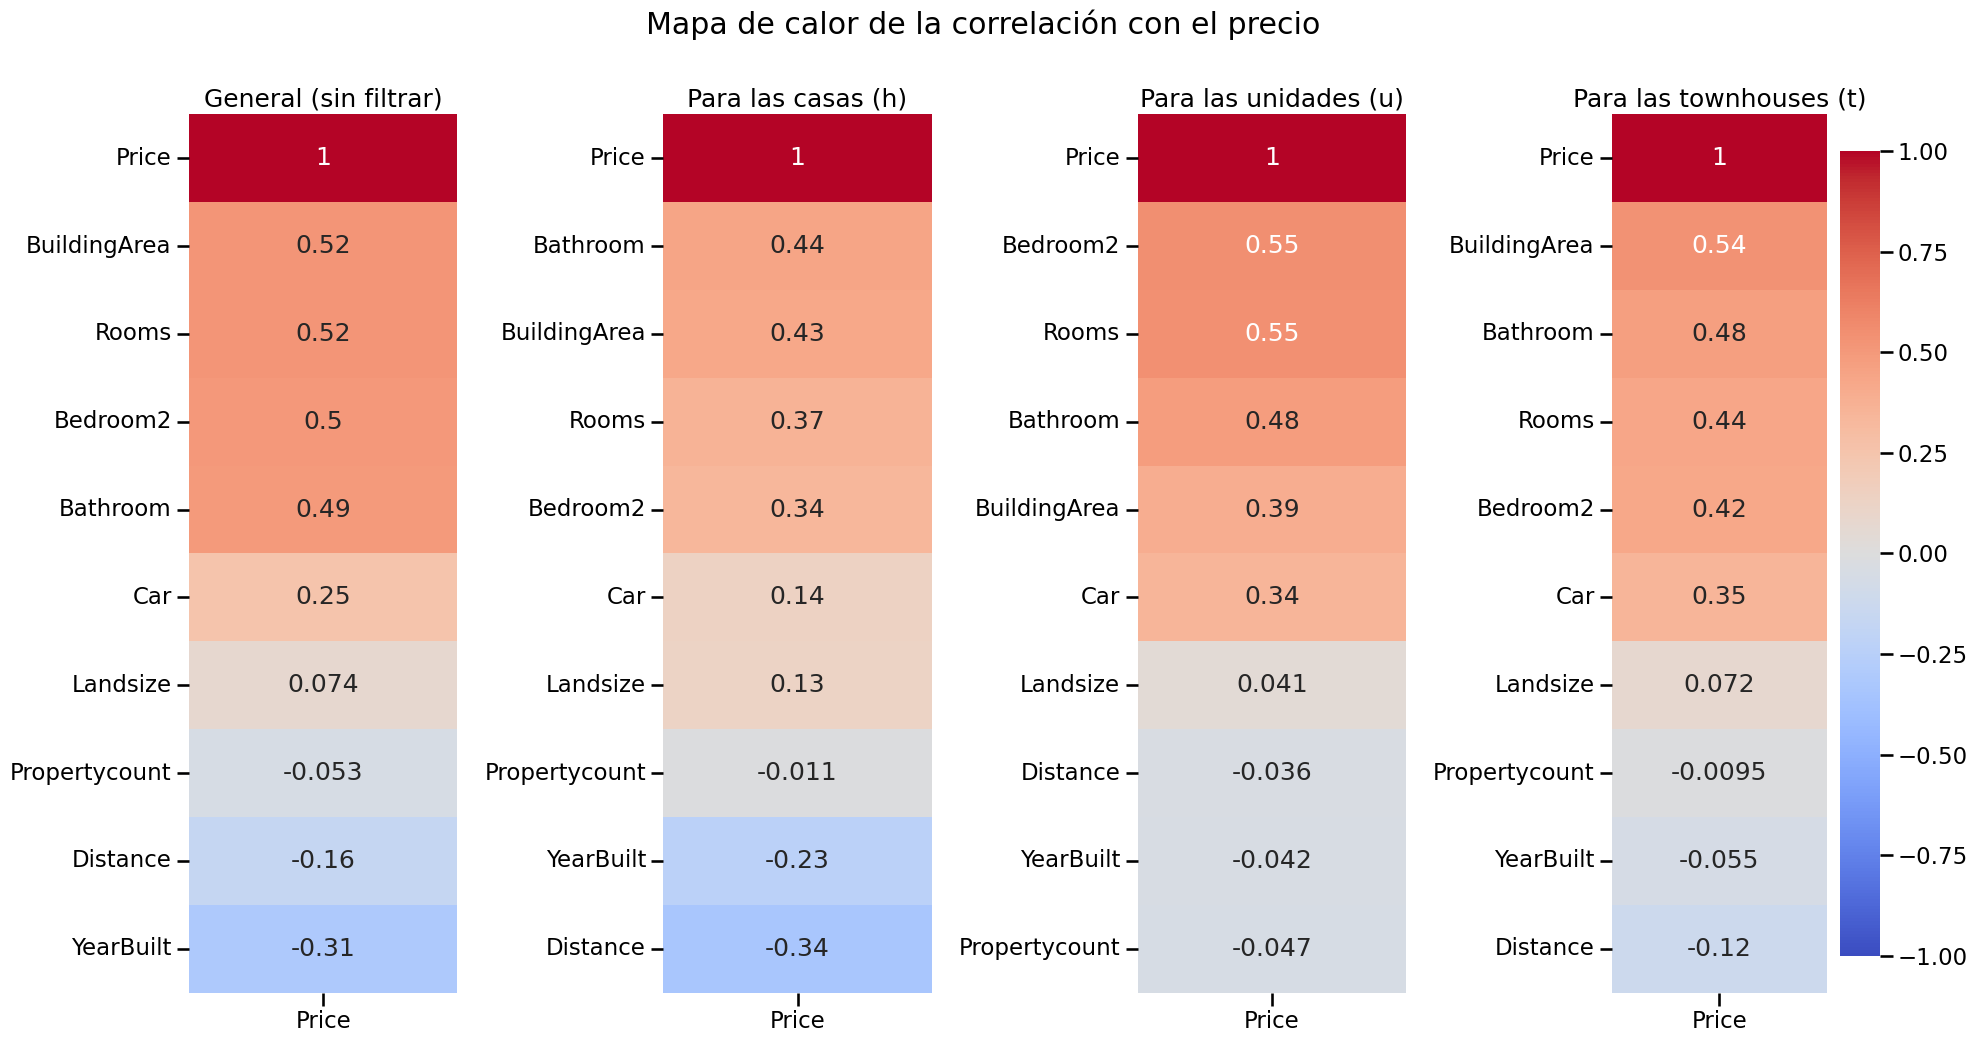

In [98]:
# correlation matrix without filtering
df_corr = df_melb[list_of_col_names].dropna().corr()

# correlation matrix for each type
df_corr_h = df_melb[list_of_col_names].loc[df_melb['Type'] == 'h'].dropna().corr()
df_corr_u = df_melb[list_of_col_names].loc[df_melb['Type'] == 'u'].dropna().corr()
df_corr_t = df_melb[list_of_col_names].loc[df_melb['Type'] == 't'].dropna().corr()

# assuming 'Price' is in list_of_col_names and sorting by 'Price' correlation
price_corr_all = df_corr.loc['Price'].sort_values(ascending=False)
price_corr_h = df_corr_h.loc['Price'].sort_values(ascending=False)
price_corr_u = df_corr_u.loc['Price'].sort_values(ascending=False)
price_corr_t = df_corr_t.loc['Price'].sort_values(ascending=False)

fig, axs = plt.subplots(1, 4, figsize=(20, 10))  # creates a grid of 1 row and 4 columns

# the color map to use
color_map='coolwarm'
# I'm using this one, cause it's a diverging color map
# that emphasizes the distance to zero

sns.heatmap(pd.DataFrame(price_corr_all), annot=True, ax=axs[0], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[0].set_title('General (sin filtrar)')

sns.heatmap(pd.DataFrame(price_corr_h), annot=True, ax=axs[1], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[1].set_title('Para las casas (h)')

sns.heatmap(pd.DataFrame(price_corr_u), annot=True, ax=axs[2], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[2].set_title('Para las unidades (u)')

sns.heatmap(pd.DataFrame(price_corr_t), annot=True, ax=axs[3], cmap=color_map, cbar=True, vmin=-1, vmax=1)
axs[3].set_title('Para las townhouses (t)')

plt.tight_layout()  # Ensures that the subplots do not overlap
plt.suptitle('Mapa de calor de la correlación con el precio', y=1.05)
plt.show()

Aquí, rápidamente podemos identificar que las columnas con baja correlación con el precio son (tomo $0.1$ como umbral):
- general (sin filtrar): `Landsize` y `Propertycount`;
- `h`: `Propertycount`;
- `u`: `Landsize`, `Distance`, `YearBuilt` y `Propertycount`;
- `t`: `Landsize`, `YearBuilt` y `Propertycount`.

Esto implica que la única columna que podemos eliminar en una primera selección es `Propertycount`. El resto importa en alguna categoría.

Hagamos una primera selección basado en lo anterior

In [103]:
relevant_columns = [
    "Postcode",
    "Price",
    "CouncilArea",
    "Suburb",
    "Rooms",
    'BuildingArea',
    "Type",
    "Bedroom2",
    "Bathroom",
    "YearBuilt",
    "Car",
    'Distance',
    "Landsize",
]

In [104]:
df_relevant_columns = df_melb[relevant_columns]
df_relevant_columns.columns

Index(['Postcode', 'Price', 'CouncilArea', 'Suburb', 'Rooms', 'BuildingArea',
       'Type', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Car', 'Distance',
       'Landsize'],
      dtype='object')

In [105]:
df_relevant_columns.describe()  # first look at numerical variables (ignore Postcode column)

,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize
count,13580.000000,1.358000e+04,13580.000000,7130.000000,13580.000000,13580.000000,8205.000000,13518.000000,13580.000000,13580.000000
mean,3105.301915,1.075684e+06,2.937997,151.967650,2.914728,1.534242,1964.684217,1.610075,10.137776,558.416127
std,90.676964,6.393107e+05,0.955748,541.014538,0.965921,0.691712,37.273762,0.962634,5.868725,3990.669241
min,3000.000000,8.500000e+04,1.000000,0.000000,0.000000,0.000000,1196.000000,0.000000,0.000000,0.000000
25%,3044.000000,6.500000e+05,2.000000,93.000000,2.000000,1.000000,1940.000000,1.000000,6.100000,177.000000
50%,3084.000000,9.030000e+05,3.000000,126.000000,3.000000,1.000000,1970.000000,2.000000,9.200000,440.000000
75%,3148.000000,1.330000e+06,3.000000,174.000000,3.000000,2.000000,1999.000000,2.000000,13.000000,651.000000
max,3977.000000,9.000000e+06,10.000000,44515.000000,20.000000,8.000000,2018.000000,10.000000,48.100000,433014.000000


Visualicemos los outliers utilizando boxplots

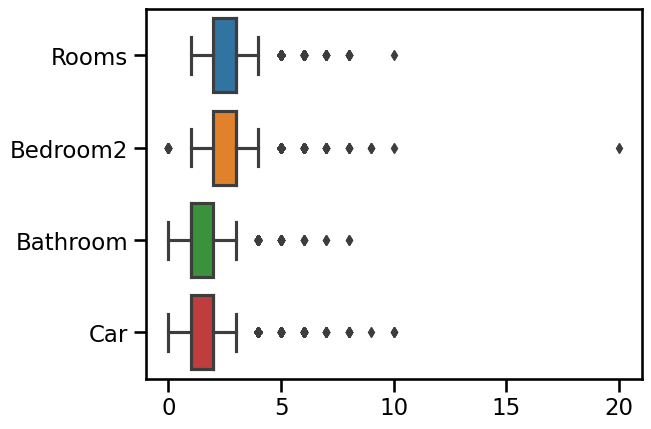

In [106]:
numeric_columns = [
    #"Postcode",
    "Price",
    #"CouncilArea",
    #"Suburb",
    "Rooms",
    'BuildingArea',
    #"Type",
    "Bedroom2",
    "Bathroom",
    "YearBuilt",
    "Car",
    'Distance',
    "Landsize",
]
# this will come in handy later

sns.boxplot(
    data=df_relevant_columns[["Rooms", "Bedroom2", "Bathroom", "Car"]], orient="h"
)  # 'landsize','YearBuilt' and 'Price' are Plotted separately for readability
plt.show()

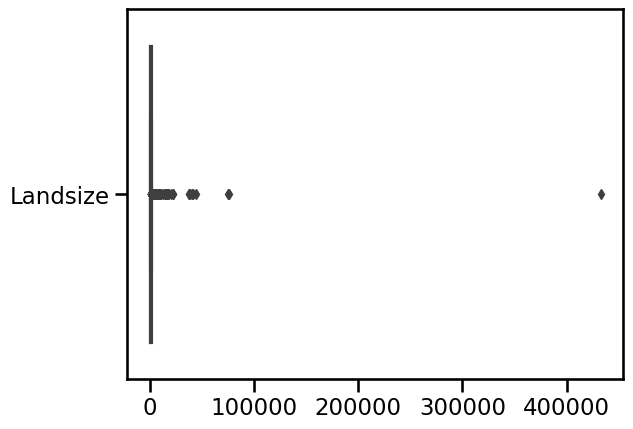

In [107]:
sns.boxplot(data=df_relevant_columns[["Landsize"]], orient="h")
plt.show()

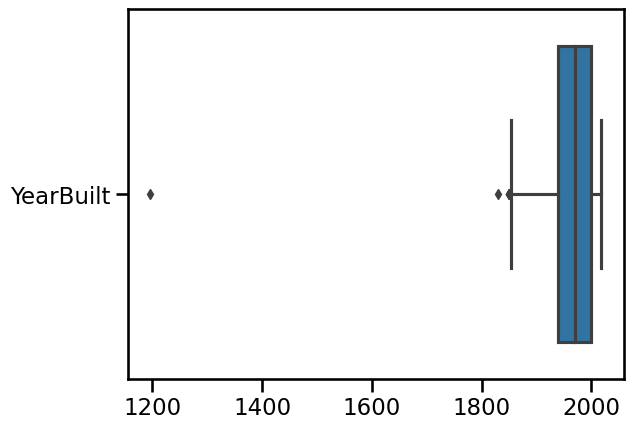

In [108]:
sns.boxplot(data=df_relevant_columns[["YearBuilt"]], orient="h")
plt.show()

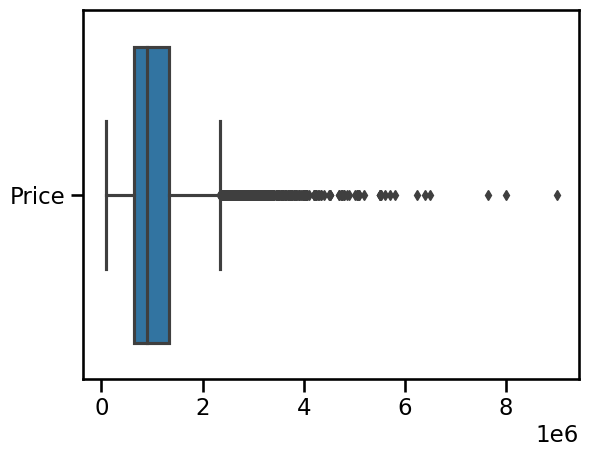

In [109]:
sns.boxplot(data=df_relevant_columns[["Price"]], orient="h")
plt.show()

In [110]:
df_relevant_columns[df_relevant_columns["Landsize"] == 433014.000000][
    "Price"
] 
# We can see that the maximun value of 'Landsize'
# has a price of just 2.7e6, which seems odd, but verifies that
# this variable is not really influencing the price.

11020    2700000.0
Name: Price, dtype: float64

Filtramos outliers, definiéndolos como:
- Criterio 1: los que están más allá de 3/2 de la distancia intercuartílica, respecto de el cuartil superior o inferior;
- Criterio 2: los que están más allá del percentil 1 o 99 (que para una distribución normal, serían los que están más allá de $3\sigma$).

Veamos primero cómo sería un filtrado general, sin tener en cuenta el tipo de la propiedad:

In [120]:
q_low = df_relevant_columns.select_dtypes(include=np.number)
q_low

df_melb_filtered = df_relevant_columns

for column in numeric_columns:
    
    # Criteria 1:
    # we calculate the quantiles
    # q_low = df_relevant_columns[column].quantile(0.25)
    # q_hi = df_relevant_columns[column].quantile(0.75)
    # we calculate the boundaries
    # k = 1.5
    # lower_limit = q_low - k * (q_hi - q_low)
    # upper_limit = q_hi + k * (q_hi - q_low)
    # this one leaves me with 5531 rows.
    
    # Cirteria 2:
    lower_limit = df_relevant_columns[column].quantile(0.01)
    upper_limit = df_relevant_columns[column].quantile(0.99)
    # this one leaves me with 2271 rows.
    
    # we filter the df
    df_melb_filtered = df_melb_filtered.loc[
        (df_melb_filtered[column] < upper_limit)
        & (df_melb_filtered[column] > lower_limit)
    ]

df_melb_filtered

,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize
11,3067.0,1350000.0,Yarra,Abbotsford,3,190.0,h,3.0,2.0,2005.0,2.0,2.5,214.0
20,3067.0,1330000.0,Yarra,Abbotsford,4,135.0,h,4.0,2.0,1900.0,2.0,2.5,780.0
24,3067.0,1100000.0,Yarra,Abbotsford,2,135.0,h,2.0,2.0,2013.0,1.0,2.5,124.0
27,3067.0,1447500.0,Yarra,Abbotsford,3,174.0,h,3.0,3.0,2012.0,1.0,2.5,166.0
29,3067.0,1135000.0,Yarra,Abbotsford,2,128.0,h,2.0,2.0,1920.0,2.0,2.5,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13548,3429.0,605000.0,NaN,Sunbury,3,229.0,h,3.0,2.0,1996.0,2.0,31.7,755.0
13568,3152.0,951000.0,NaN,Wantirna,4,200.0,h,4.0,2.0,1981.0,2.0,14.7,704.0
13571,3152.0,1330000.0,NaN,Wantirna South,4,191.0,h,4.0,2.0,1980.0,2.0,14.7,717.0
13573,3030.0,635000.0,NaN,Werribee,4,172.0,h,4.0,2.0,1980.0,1.0,14.7,662.0


Llamativamente, el criterio 2 elimina una cantidad enorme de datos. Sin embargo, en vistas de que el tipo de propiedad presenta diferencias relevantes, resulta más adecuando hacer el filtrado con los outliers definidos según su categoría:

In [121]:
def remove_outliers_by_type(df):
    df_filtered = pd.DataFrame()  # Empty dataframe to store filtered data
    
    for t in ['h', 'u', 't']:
        df_selected_type = df.loc[df['Type'] == t].copy()  # Select rows of a certain type
        
        for column in df_selected_type.select_dtypes(include=np.number).columns:
            
            # Criteria 1:
            # we calculate the quantiles
            # q_low = df_selected_type[column].quantile(0.25)
            # q_hi = df_selected_type[column].quantile(0.75)
            # we calculate the boundaries
            # k = 1.5
            # lower_limit = q_low - k * (q_hi - q_low)
            # upper_limit = q_hi + k * (q_hi - q_low)
            # this one leaves me with 5803 rows.
            
            # Cirteria 2:
            lower_limit = df_selected_type[column].quantile(0.01)
            upper_limit = df_selected_type[column].quantile(0.99)
            # this one leaves me with 6162 rows.

            # we filter the df
            df_selected_type = df_selected_type.loc[
                (df_selected_type[column] <= upper_limit)
                & (df_selected_type[column] >= lower_limit)
            ]
        
        # Append filtered data of the current type to df_filtered
        df_filtered = pd.concat([df_filtered, df_selected_type])
    
    return df_filtered

df_melb_filtered = remove_outliers_by_type(df_relevant_columns)
df_melb_filtered

,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize
1,3067.0,1035000.0,Yarra,Abbotsford,2,79.0,h,2.0,1.0,1900.0,0.0,2.5,156.0
2,3067.0,1465000.0,Yarra,Abbotsford,3,150.0,h,3.0,2.0,1900.0,0.0,2.5,134.0
4,3067.0,1600000.0,Yarra,Abbotsford,4,142.0,h,3.0,1.0,2014.0,2.0,2.5,120.0
6,3067.0,1876000.0,Yarra,Abbotsford,3,210.0,h,4.0,2.0,1910.0,0.0,2.5,245.0
7,3067.0,1636000.0,Yarra,Abbotsford,2,107.0,h,2.0,1.0,1890.0,2.0,2.5,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,3147.0,1650000.0,NaN,Ashburton,4,200.0,t,4.0,2.0,2005.0,1.0,10.2,338.0
13355,3165.0,1130000.0,NaN,Bentleigh East,4,183.0,t,4.0,2.0,2012.0,2.0,13.8,270.0
13373,3057.0,959000.0,NaN,Brunswick East,3,122.0,t,3.0,2.0,1998.0,1.0,4.0,138.0
13504,3149.0,1035000.0,NaN,Mount Waverley,3,138.0,t,3.0,2.0,2006.0,2.0,14.2,236.0


Ahora, vemos que las filas que sobreviven son muchísimas más, confirmando que el mezclar
categorías está produciendo una definición poco confiable de outlier. Nos quedamos con el
criterio 2, pues este preserva una mayor cantidad de datos, y con el filtrado según tipo,
pues es lo más adecuado para nuestros datos.

# Inciso 2

In [73]:
df_airbnb

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN
...,...,...,...,...,...
242,7367.0,230.000000,1,NaN,NaN
243,8938.0,296.000000,1,NaN,NaN
244,9004.0,226.000000,1,NaN,NaN
245,9540.0,245.000000,1,NaN,NaN


In [74]:
# df_melb_filtered.join(df_airbnb_filtered, on=)

In [75]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/tmp/ipykernel_6776/3171400748.py:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


In [76]:
airbnb_df

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,55,NaN,NaN
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,129,NaN,NaN
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,53,NaN,NaN
22893,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,130,NaN,NaN


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)